## 0. Setup

In [6]:
import torch
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as pt

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.gridspec as gs
%load_ext autoreload
%autoreload 2

pt.update_plot_defaults()

# Load dataset
tensor_flatten = T.Compose([T.ToTensor(), T.Lambda(torch.flatten)])
MNIST_train_dataset = torchvision.datasets.MNIST(root='../datasets/MNIST_data/', train=True, download=False,
                                         transform=tensor_flatten)
MNIST_test_dataset = torchvision.datasets.MNIST(root='../datasets/MNIST_data/',
                                        train=False, download=False,
                                        transform=tensor_flatten)

# Add index to train & test data
MNIST_train = []
for idx,(data,target) in enumerate(MNIST_train_dataset):
    target = torch.eye(len(MNIST_train_dataset.classes))[target]
    MNIST_train.append((idx, data, target))
    
MNIST_test = []
for idx,(data,target) in enumerate(MNIST_test_dataset):
    target = torch.eye(len(MNIST_test_dataset.classes))[target]
    MNIST_test.append((idx, data, target))
    
# Put data in dataloader
data_generator = torch.Generator()
train_dataloader = torch.utils.data.DataLoader(MNIST_train, shuffle=True, generator=data_generator)
train_sub_dataloader = torch.utils.data.DataLoader(MNIST_train[0:10000], shuffle=True, generator=data_generator)
val_dataloader = torch.utils.data.DataLoader(MNIST_train[-10000:], batch_size=10000, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(MNIST_test, batch_size=10000, shuffle=False)

epochs = 1
data_seed = 0
network_seed = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Backprop network

In [2]:
# Create network
network_name = "EIANN_1_hidden_mnist_backprop_relu_SGD_config"
network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

In [1]:
# Load pretrained network
saved_network_path = f"saved_networks/{network_name}.pickle"
bp_network.load(saved_network_path)

pt.plot_batch_accuracy(bp_network, test_dataloader, population=bp_network.H1.E)
pt.plot_rsm(bp_network,test_dataloader)

Epochs: 100%|██████████| 1/1 [00:17<00:00, 17.26s/it]


Model not saved
Batch accuracy = 93.33999633789062%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:631: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:208: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


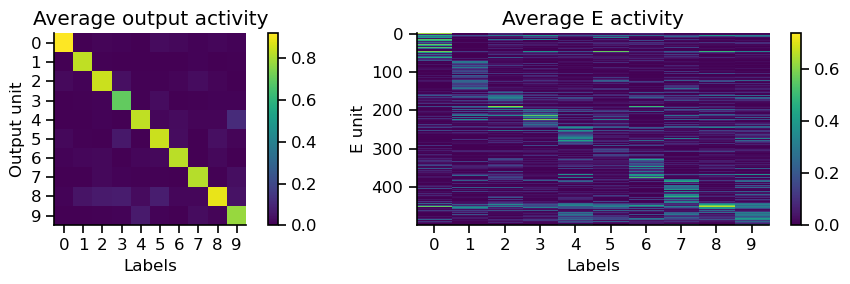

<Figure size 1000x300 with 0 Axes>

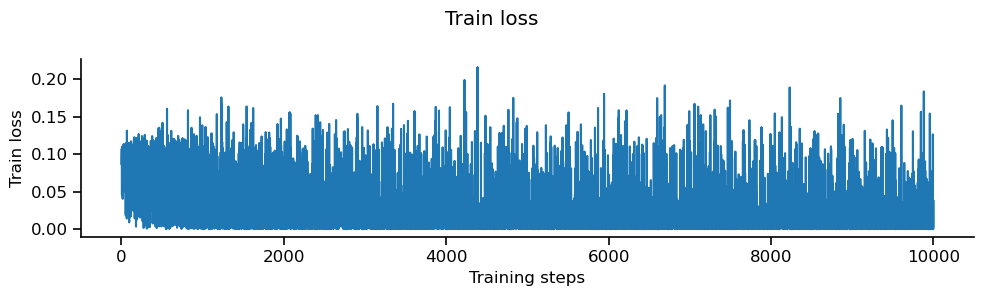

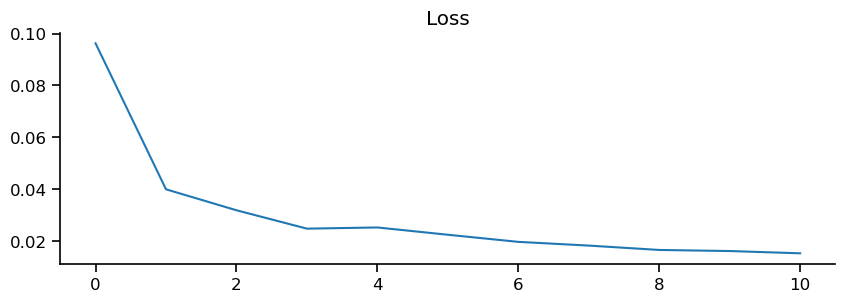

In [3]:
# Train network
data_generator.manual_seed(data_seed)
bp_network.train_and_validate(train_sub_dataloader, 
                              test_dataloader, 
                              epochs=epochs,
                              val_interval=(0,-1,1000),
                              store_history=True, 
                              store_weights=True,
                              status_bar=True)

bp_network.save(filename=network_name)

pt.plot_batch_accuracy(bp_network, test_dataloader, population=bp_network.H1.E)
plt.figure()
pt.plot_train_loss_history(bp_network)
plt.show()

# pt.plot_test_loss_history(bp_network, test_dataloader, stepsize=50)
plt.figure()
plt.plot(bp_network.val_loss_history)
plt.title('Loss')b
plt.show()

Computing tuning strength...
Generating plots...
W_min = -0.07880624383687973, W_max = 0.07297822833061218


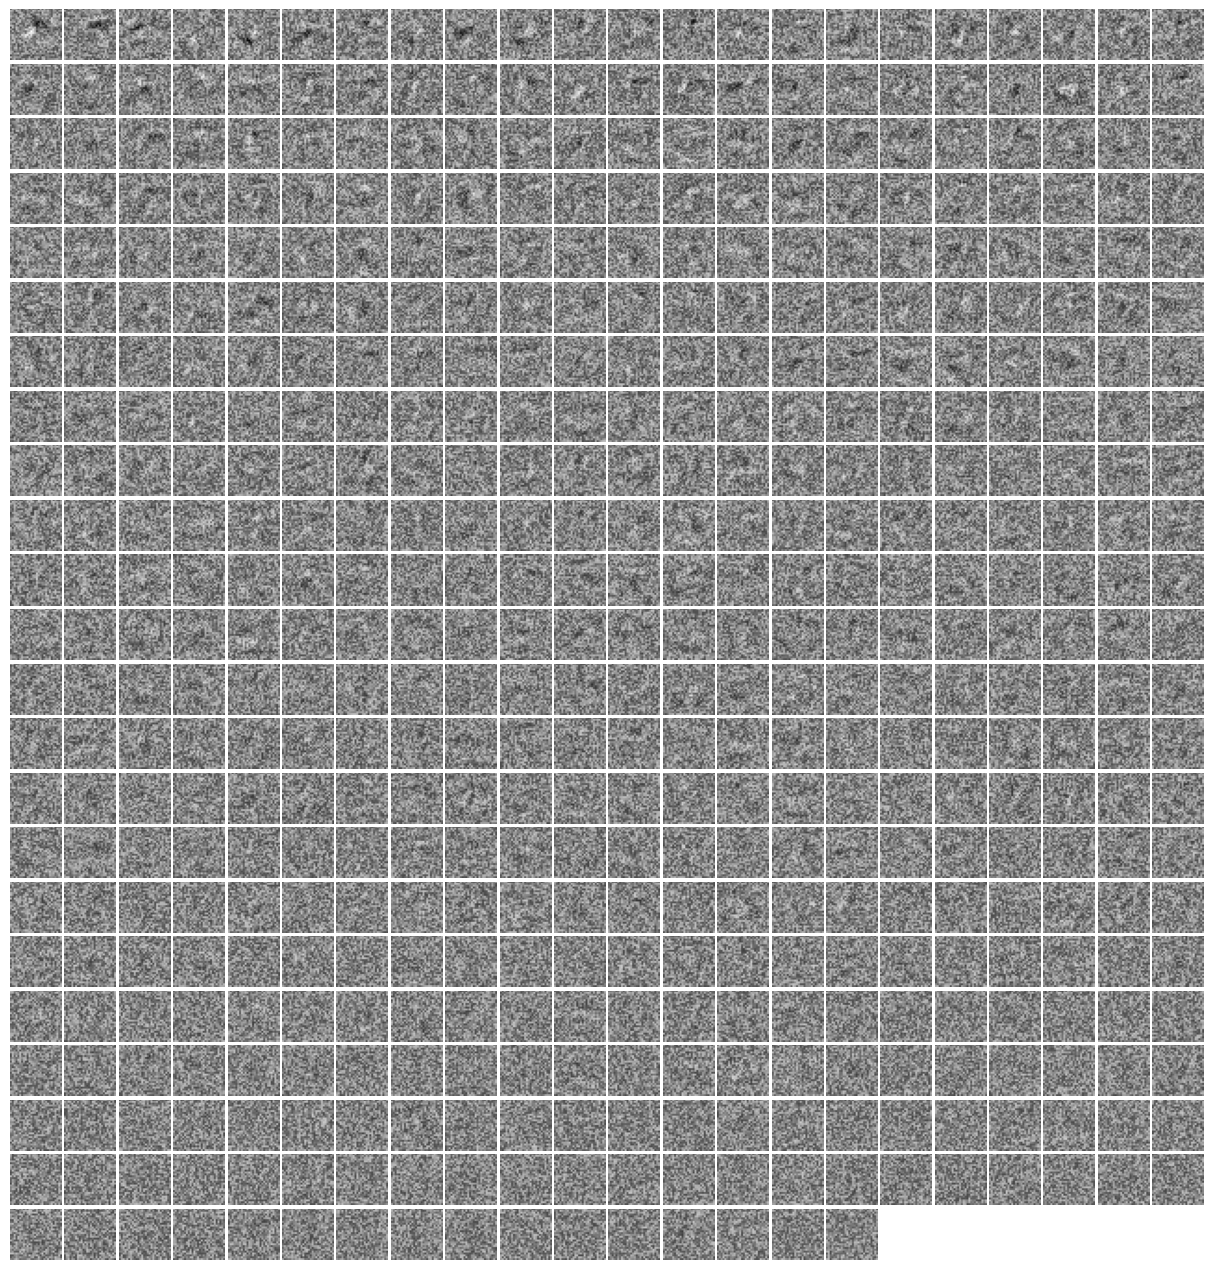

In [8]:
pt.plot_hidden_weights(bp_network.module_dict['H1E_InputE'].weight, sort=True) 

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

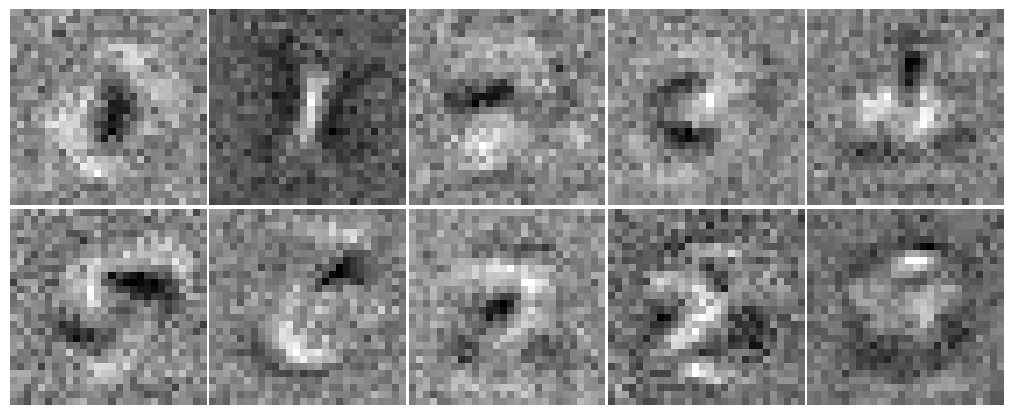

In [9]:
pt.plot_receptive_fields(bp_network.Output.E, test_dataloader)

# Backprop Dale network

In [35]:
# Create network
# network_name = "EIANN_1_hidden_mnist_backprop_Dale_relu_SGD_config"
# network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}.yaml')

network_name = "20230102_EIANN_1_hidden_mnist_bpDale_softplus_config"
network_config = ut.read_from_yaml(f'../optimize/data/{network_name}.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bpDale_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

Loading model data from 'saved_networks/20230102_EIANN_1_hidden_mnist_bpDale_softplus_config.pickle'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/20230102_EIANN_1_hidden_mnist_bpDale_softplus_config.pickle'
Batch accuracy = 91.41000366210938%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:631: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:659: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(0, num_labels))
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0, num_labels))


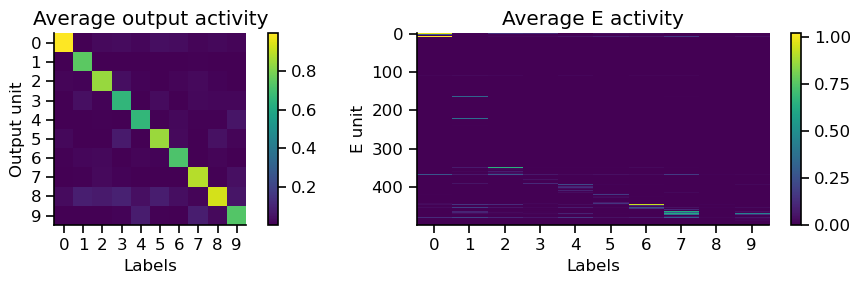

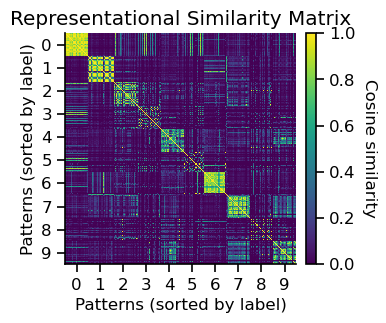

In [36]:
# Load pretrained network
saved_network_path = f"saved_networks/{network_name}.pickle"
bpDale_network.load(saved_network_path)

pt.plot_batch_accuracy(bpDale_network, test_dataloader, population=bpDale_network.H1.E)
pt.plot_rsm(bpDale_network,test_dataloader)

In [4]:
# # Train network
# data_generator.manual_seed(data_seed)
# bpDale_network.train_and_validate(train_sub_dataloader, 
#                               test_dataloader, 
#                               epochs=epochs,
#                               val_interval=(0,-1,1000),
#                               store_history=True, 
#                               store_weights=True,
#                               status_bar=True)

# bpDale_network.save(filename=network_name)

# pt.plot_batch_accuracy(bpDale_network, test_dataloader, population=bpDale_network.H1.E)
# plt.figure()
# pt.plot_train_loss_history(bpDale_network)
# plt.show()

Computing tuning strength...
Generating plots...
W_min = 0.0, W_max = 0.19167248904705048


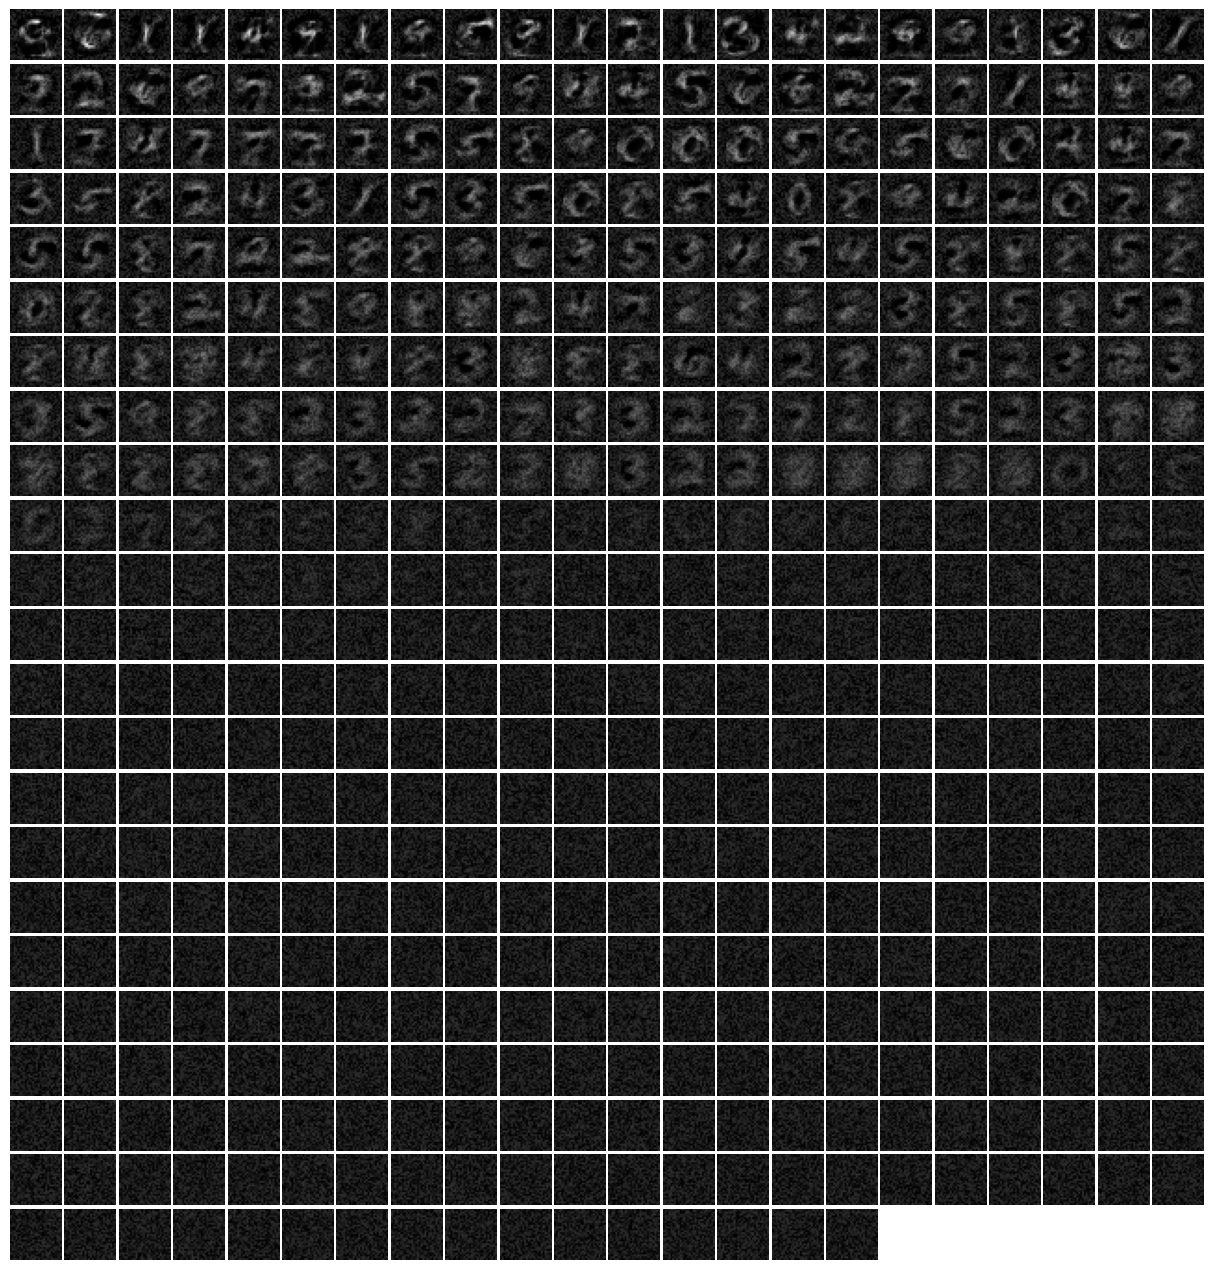

In [4]:
pt.plot_hidden_weights(bpDale_network.module_dict['H1E_InputE'].weight, sort=True)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: -3.0233895778656006, Max activity: 8.10833740234375


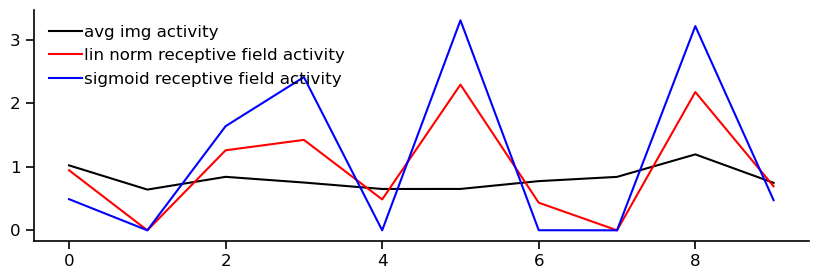

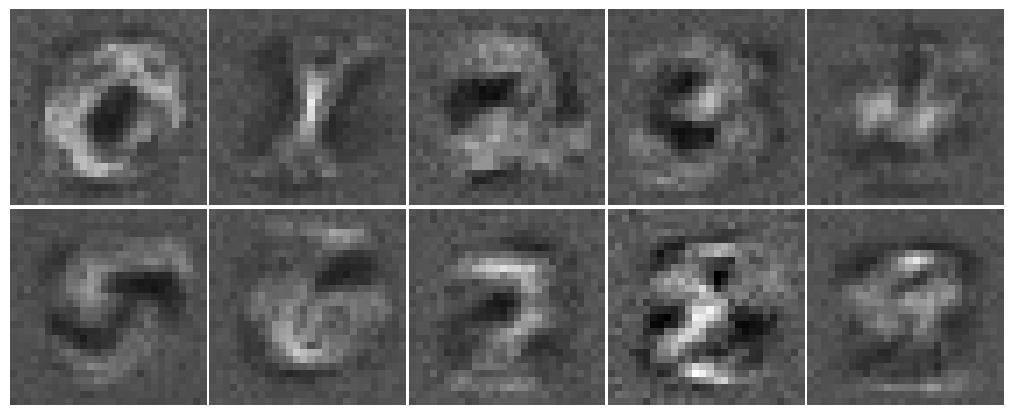

In [38]:
# Method 1: colored by activity from act-weighted-average input
pt.plot_receptive_fields(bpDale_network.Output.E, test_dataloader)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: 0.0, Max activity: 2.293684244155884


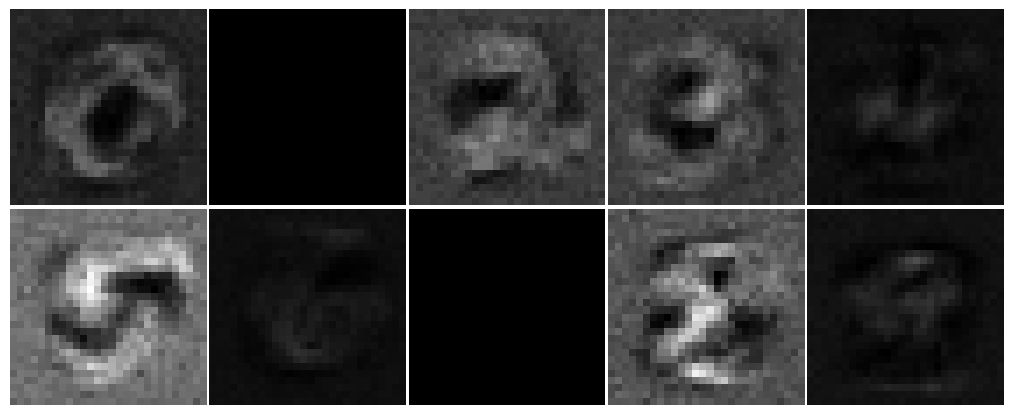

In [39]:
# Method 2: colored by activity from linearly scaled receptive field
pt.plot_receptive_fields(bpDale_network.Output.E, test_dataloader)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: 7.299893796075366e-29, Max activity: 3.295372486114502


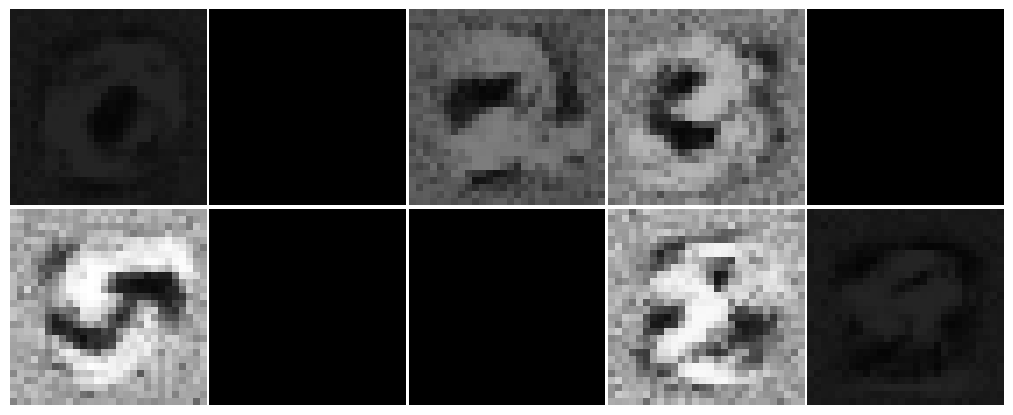

In [40]:
# Method 3: colored by activity from sigmoid scaled receptive field
pt.plot_receptive_fields(bpDale_network.Output.E, test_dataloader)

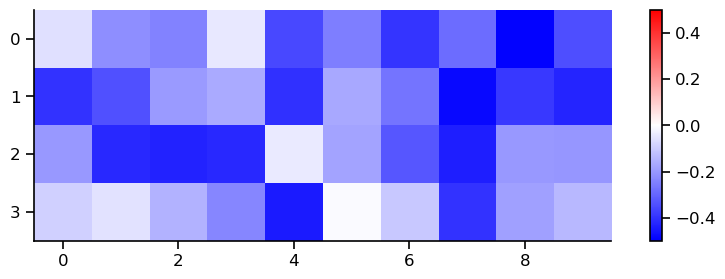

In [19]:
plt.imshow(bpDale_network.Output.E.Output.FBI.weight.detach().T, cmap='bwr',vmin=-0.5,vmax=0.5)
plt.colorbar()
plt.show()

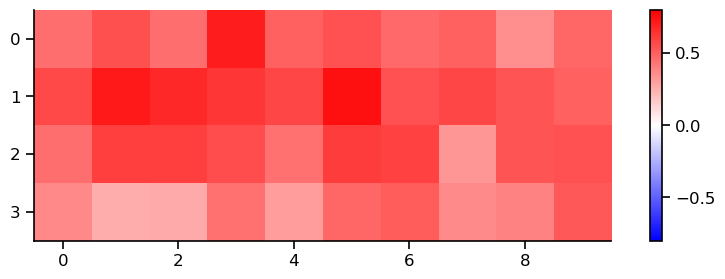

In [24]:
plt.imshow(bpDale_network.Output.FBI.Output.E.weight.detach(), cmap='bwr',vmin=-0.8,vmax=0.8)
plt.colorbar()
plt.show()

Batch accuracy = 91.41000366210938%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:561: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


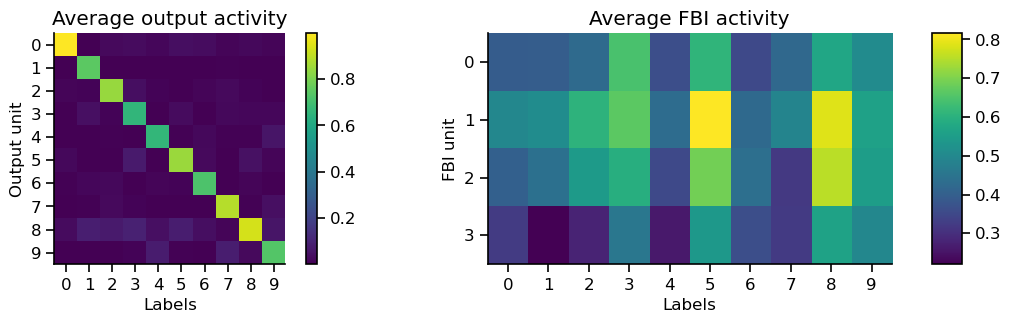

In [30]:
pt.plot_batch_accuracy(bpDale_network, test_dataloader, population=bpDale_network.Output.FBI)

# Gjorgjieva Hebb network

In [17]:
# Create network
network_name = "20230103_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_B"
# network_config = ut.read_from_yaml('../optimize/data/20221229_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config.yaml')
# network_config = ut.read_from_yaml('../config/MNIST/EIANN_0_hidden_mnist_Gjorgjieva_Hebb_config.yaml')
network_config = ut.read_from_yaml(f'../optimize/data/{network_name}.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

gj_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

Model successfully loaded from 'saved_networks/20230103_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_B.pickle'
Batch accuracy = 9.670000076293945%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:561: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:589: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticks(x_ticks)
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:590: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticks(y_ticks)


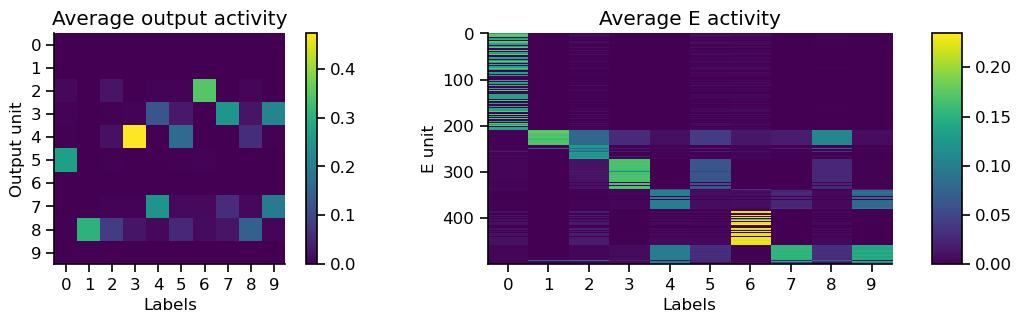

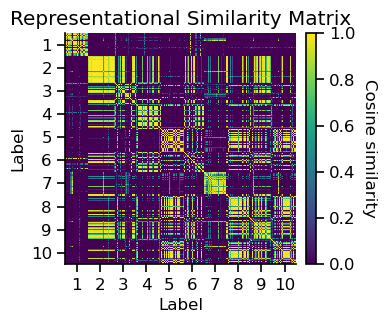

In [18]:
# Load pretrained network
saved_network_path = f"saved_networks/{network_name}.pickle"
gj_network.load(saved_network_path)

pt.plot_batch_accuracy(gj_network, test_dataloader, population=gj_network.H1.E)
pt.plot_rsm(gj_network,test_dataloader)

In [18]:
# # Train network
# data_generator.manual_seed(data_seed)
# gj_network.train_and_validate(train_sub_dataloader, 
#                               test_dataloader, 
#                               epochs=epochs,
#                               val_interval=(0,-1,1000),
#                               store_history=True, 
#                               store_weights=True, 
#                               status_bar=True)

# gj_network.save(filename=network_name)

# pt.plot_batch_accuracy(gj_network, test_dataloader, population=gj_network.H1.E)
# plt.figure()
# pt.plot_train_loss_history(gj_network)
# plt.show()

Computing tuning strength...
Generating plots...
W_min = 2.3079385707429737e-42, W_max = 0.03570596128702164


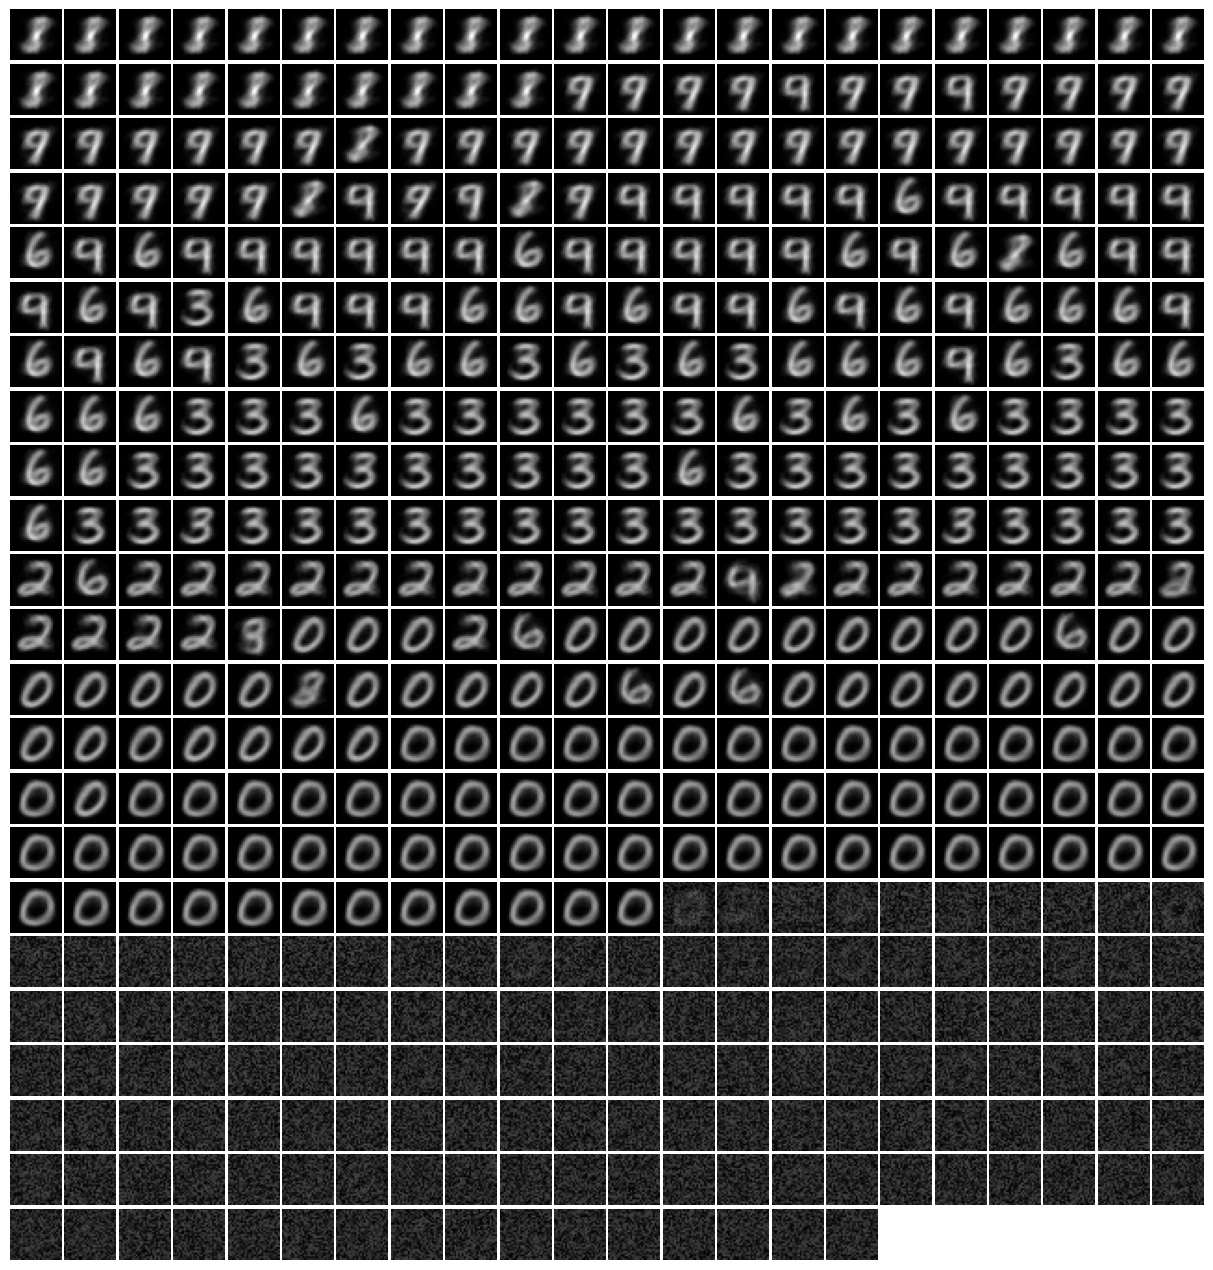

In [19]:
pt.plot_hidden_weights(gj_network.module_dict['H1E_InputE'].weight, sort=True)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

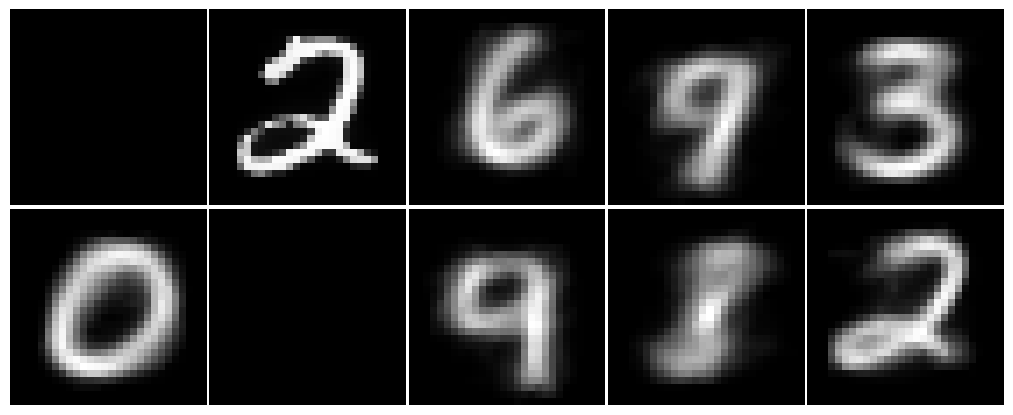

In [20]:
pt.plot_receptive_fields(gj_network.Output.E, test_dataloader)

# BTSP network

In [2]:
# Create network
# network_name = "20221227_EIANN_1_hidden_mnist_BTSP_config_E"
network_name = "20230104_EIANN_1_hidden_mnist_BTSP_config_F"
network_config = ut.read_from_yaml(f'../optimize/data/{network_name}.yaml')

# network_name = 'EIANN_1_hidden_mnist_BTSP_config'
# network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

btsp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

Loading model data from 'saved_networks/20230104_EIANN_1_hidden_mnist_BTSP_config_F.pickle'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/20230104_EIANN_1_hidden_mnist_BTSP_config_F.pickle'
Batch accuracy = 80.91999816894531%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:631: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:659: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(0, num_labels))
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0, num_labels))


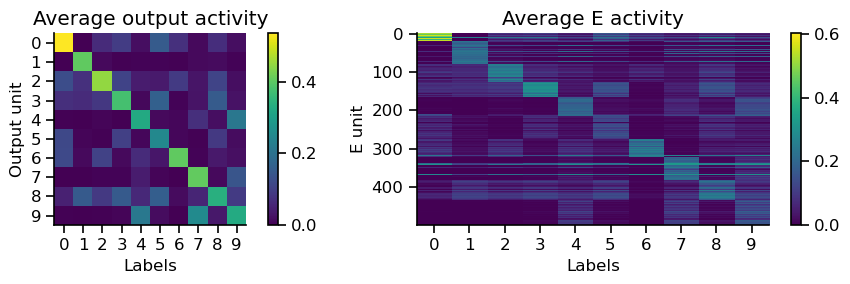

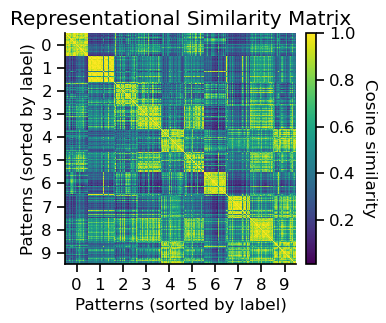

In [3]:
# Load pretrained network
saved_network_path = f"saved_networks/{network_name}.pickle"
# saved_network_path = f"saved_networks/{network_name}_early.pickle"

btsp_network.load(saved_network_path)

pt.plot_batch_accuracy(btsp_network, test_dataloader, population=btsp_network.H1.E)
pt.plot_rsm(btsp_network,test_dataloader)

In [4]:
# # Train network
# data_generator.manual_seed(data_seed)
# btsp_network.train_and_validate(train_sub_dataloader, 
#                                 test_dataloader, 
#                                 epochs=epochs,
#                                 val_interval=(0,-1,200),
#                                 store_history=True, 
#                                 store_weights=True, 
#                                 status_bar=True)

# btsp_network.save(filename=network_name)

# pt.plot_batch_accuracy(btsp_network, test_dataloader, population=btsp_network.H1.E)
# plt.figure()
# pt.plot_train_loss_history(btsp_network)
# plt.show()
# pt.plot_rsm(btsp_network,test_dataloader)

Computing tuning strength...
Generating plots...
W_min = 1.7380201444705534e-10, W_max = 0.026760391891002655


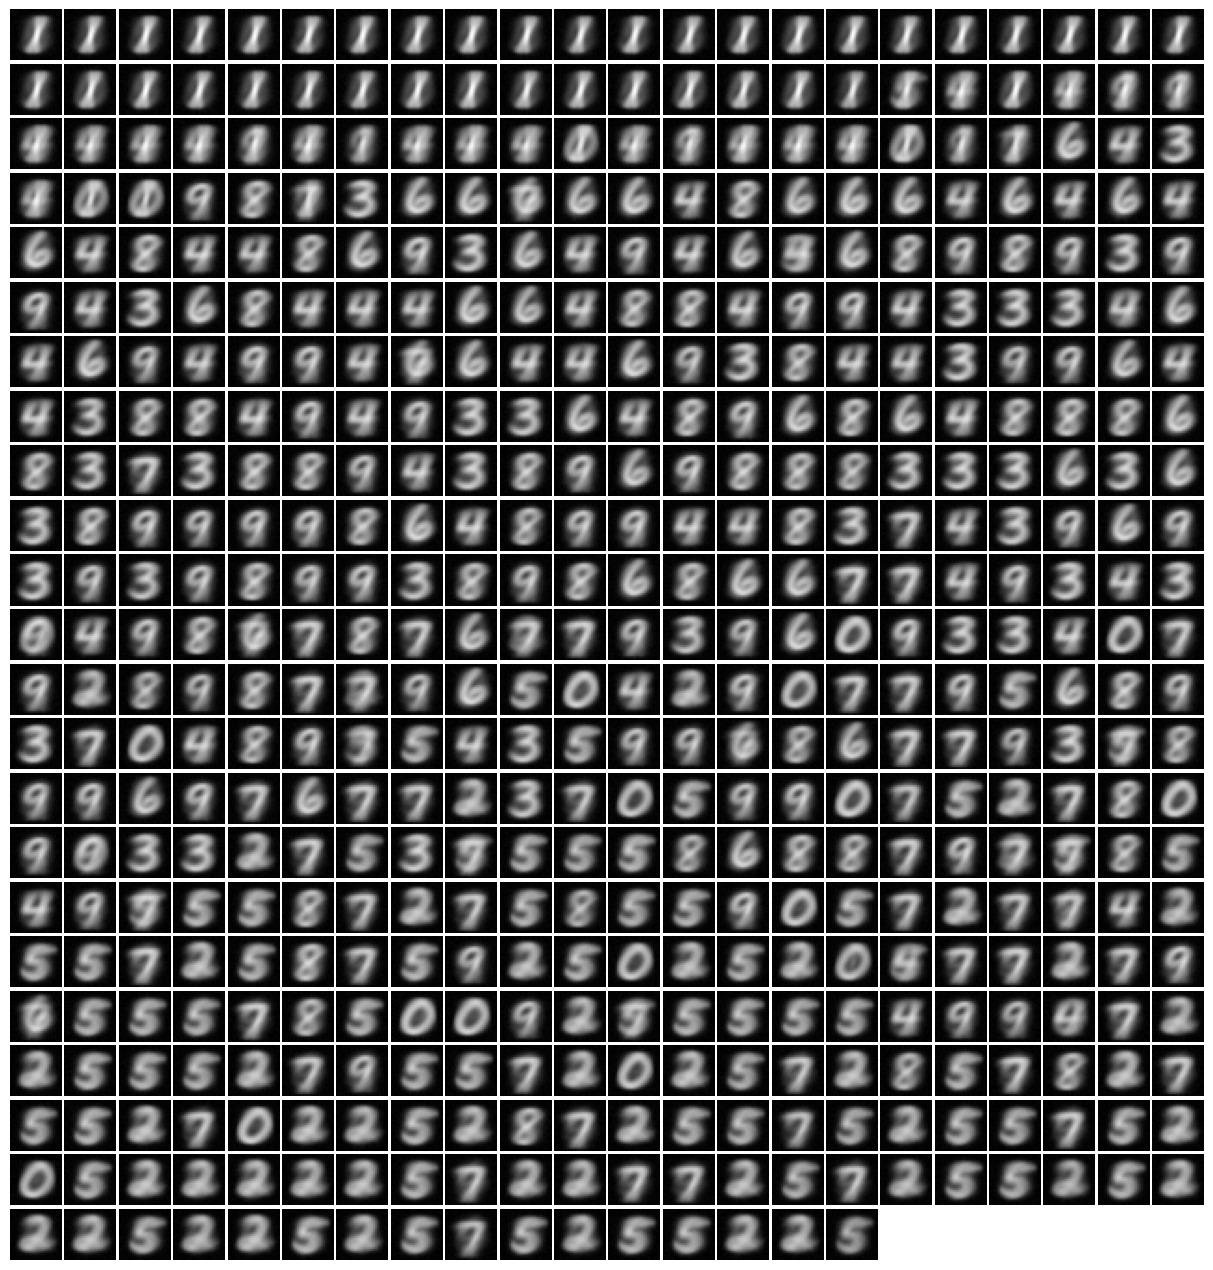

In [53]:
pt.plot_hidden_weights(btsp_network.module_dict['H1E_InputE'].weight, sort=True)

In [29]:
# pt.plot_receptive_fields(btsp_network.Output.E, test_dataloader)

In [8]:
# btsp_network.load_state_dict(btsp_network.param_history[50])
# pt.plot_batch_accuracy(btsp_network, test_dataloader, population=btsp_network.H1.E)

# pt.plot_hidden_weights(btsp_network.module_dict['H1E_InputE'].weight, sort=True)

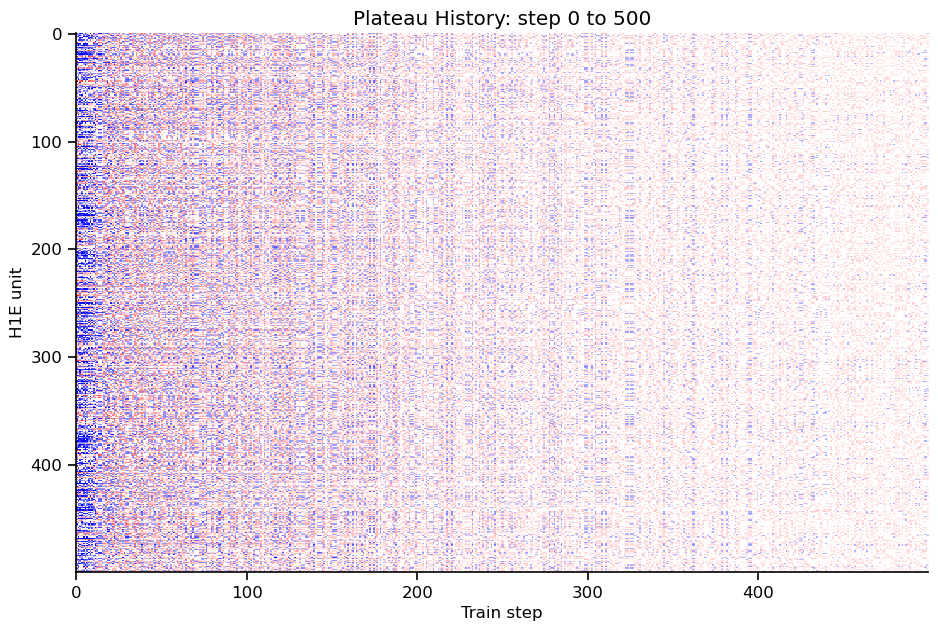

In [54]:
pt.plot_plateaus(population=btsp_network.H1.E, start=0, end=500)

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:708: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ax.set_xticks(label_centers)


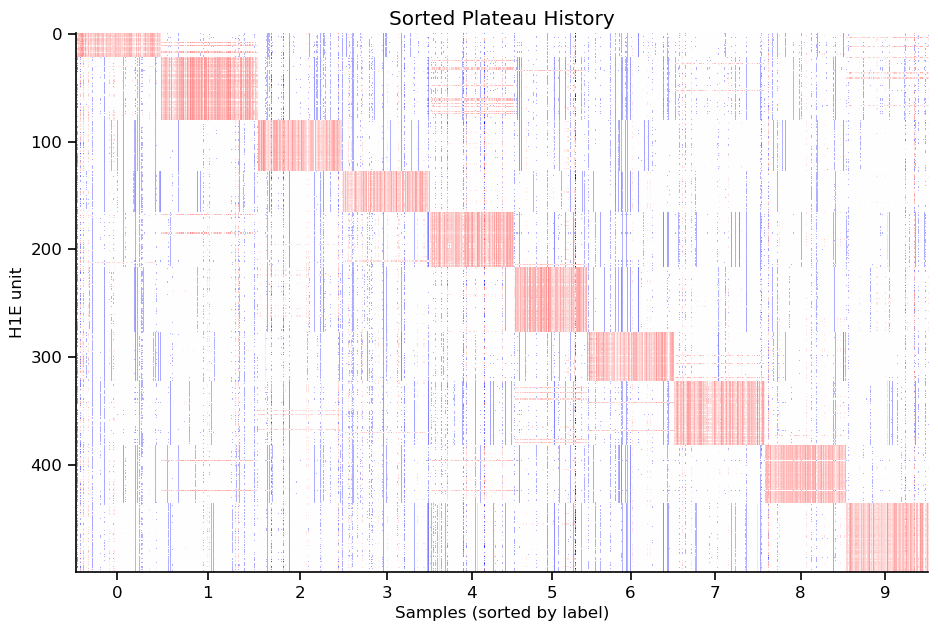

In [55]:
sorted_plateaus, unit_ids = pt.plot_sorted_plateaus(btsp_network.H1.E, test_dataloader)

  0%|          | 0/51 [00:00<?, ?it/s]

Input->H1 weight history: Unit 368, steps 0-10000
W_min = 2.6126787133762264e-07, W_max = 0.022753261029720306


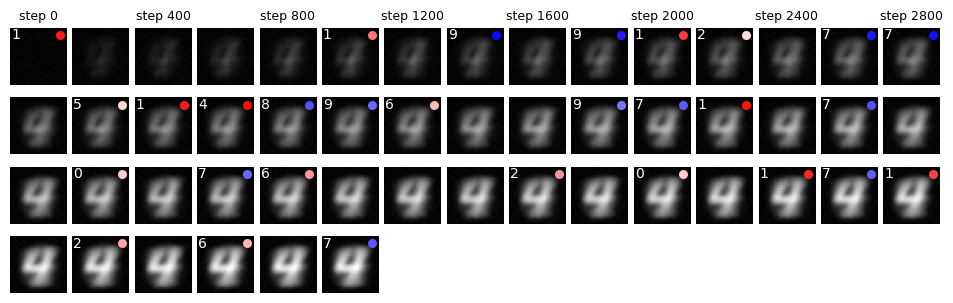

In [56]:
pt.plot_hidden_weight_history(btsp_network, unit=368)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: 0.01830574870109558, Max activity: 9.416610717773438


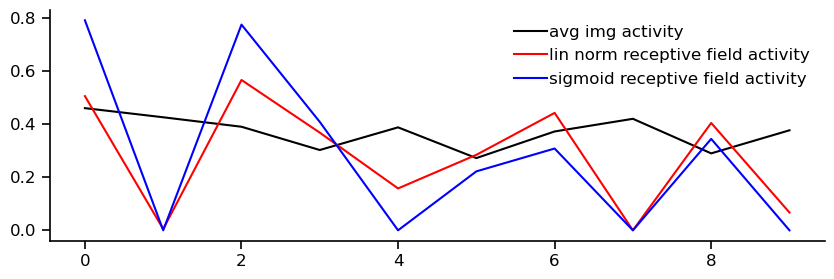

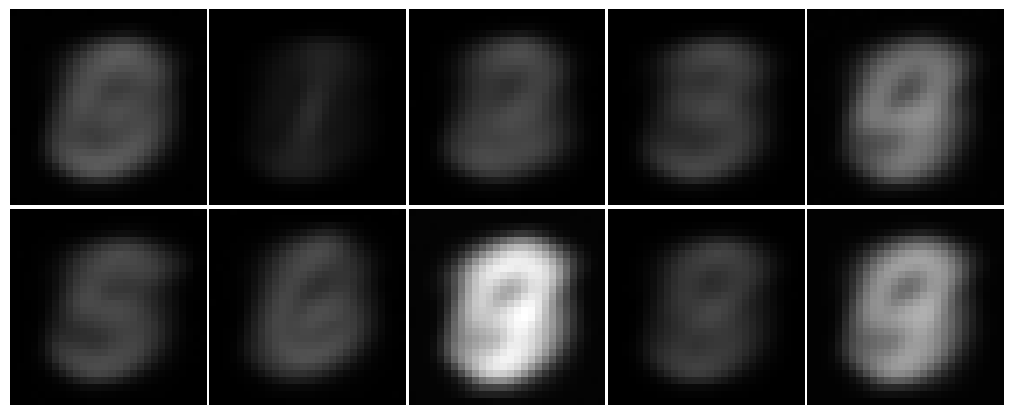

In [32]:
# Method 1: colored by activity from act-weighted-average input
pt.plot_receptive_fields(btsp_network.Output.E, test_dataloader)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: 0.0, Max activity: 0.5653460025787354


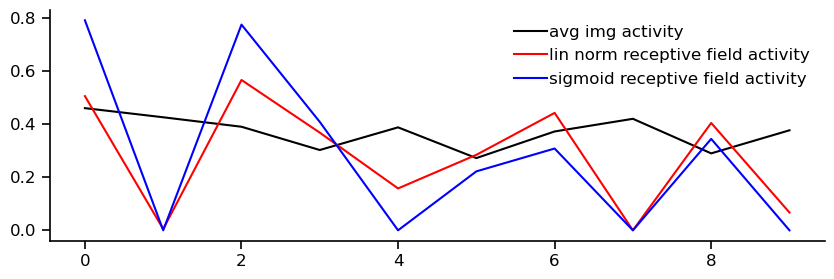

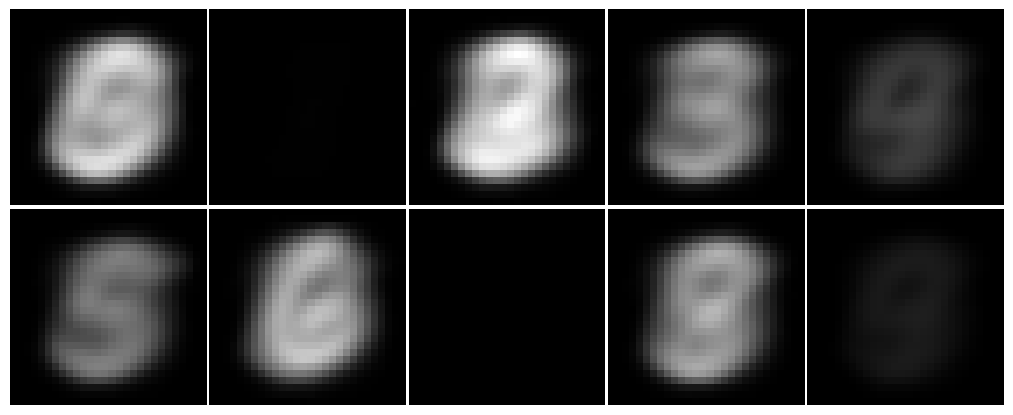

In [33]:
# Method 2: colored by activity from linearly scaled receptive field
pt.plot_receptive_fields(btsp_network.Output.E, test_dataloader)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: 0.0, Max activity: 0.7893121838569641


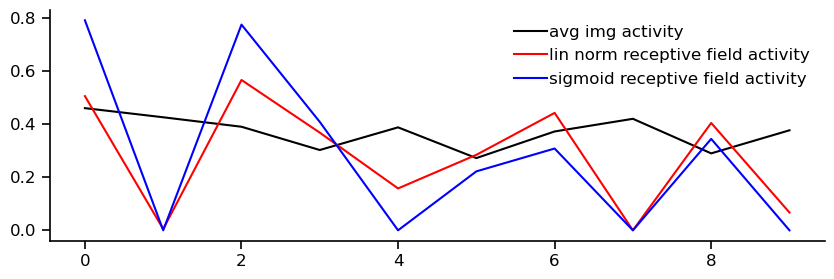

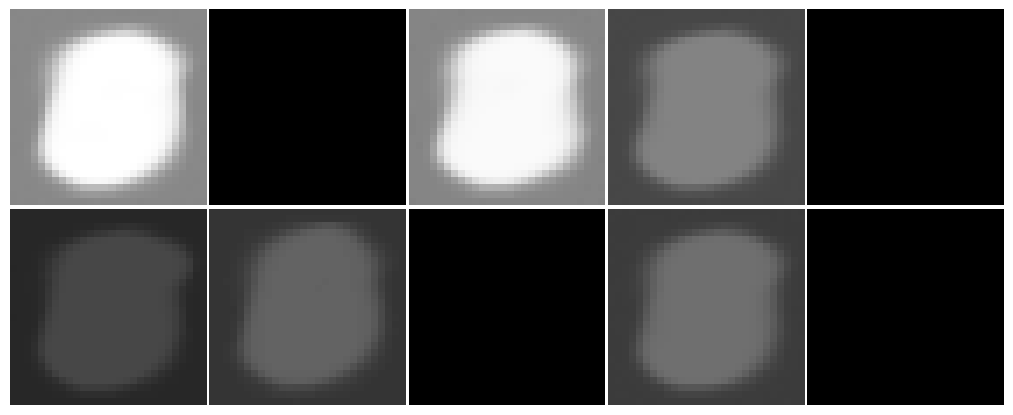

In [34]:
# Method 3: colored by activity from sigmoid scaled receptive field
pt.plot_receptive_fields(btsp_network.Output.E, test_dataloader)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

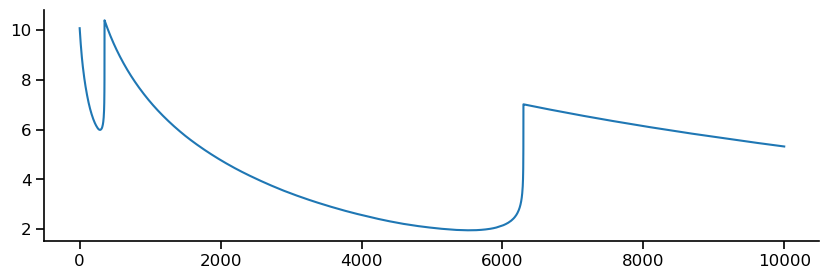

In [150]:
population = btsp_network.Output.E
input_images,activity_preferred_input,loss_history = ut.compute_receptive_fields(population, test_dataloader)
plt.plot(loss_history)

In [67]:
# population = btsp_network.H1.E
# input_images,activity_preferred_input,loss_history = ut.compute_receptive_fields(population, test_dataloader)
# plt.plot(loss_history)